In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.utils import resample

In [2]:
df = pd.read_csv("prediksicuaca2.csv")

In [3]:
df

,date,precipitation,temp_max,temp_min,wind,weather,Prediction
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle,1
1,1/2/2012,10.9,10.6,2.8,4.5,rain,3
2,1/3/2012,0.8,11.7,7.2,2.3,rain,3
3,1/4/2012,20.3,12.2,5.6,4.7,rain,3
4,1/5/2012,1.3,8.9,2.8,6.1,rain,3
...,...,...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9,rain,3
1457,12/28/2015,1.5,5.0,1.7,1.3,rain,3
1458,12/29/2015,0.0,7.2,0.6,2.6,fog,5
1459,12/30/2015,0.0,5.6,-1.0,3.4,sun,4


In [4]:
df["Prediction"].value_counts()

3    641
4    640
5    101
1     53
2     26
Name: Prediction, dtype: int64

In [5]:
df["weather"].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [6]:
x = df.drop(["weather","date","Prediction"],axis=1)
y = df["Prediction"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42) #Memangil SMOTE dengan random state 42  menghasilkan hasil yang dapat direproduksi secara konsisten. 
X_resampled, y_resampled = smote.fit_resample(x, y) # menyimpan hasil over samping tersebut pada x y resampled

# Membagi data menjadi data latih dan data uji
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

Accuracy: 0.7558502340093604
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.83      0.74       255
           2       0.91      1.00      0.95       251
           3       0.90      0.73      0.80       258
           4       0.69      0.43      0.53       268
           5       0.66      0.82      0.73       250

    accuracy                           0.76      1282
   macro avg       0.76      0.76      0.75      1282
weighted avg       0.76      0.76      0.75      1282



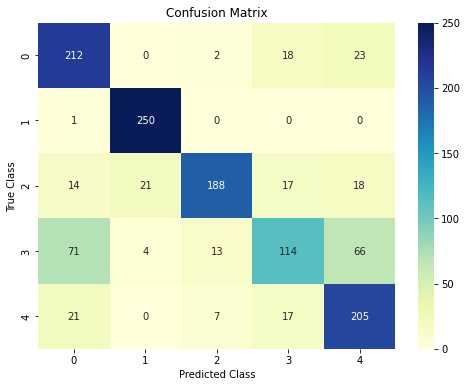

In [8]:
# Membuat model KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)


# Melatih model-model individu

knn_classifier.fit(X_train_oversampled, y_train_oversampled)
knn_classifier2 = knn_classifier.predict(X_test_oversampled)

y_pred_oversampled = knn_classifier.predict(X_test_oversampled)

# Evaluasi model
accuracy_oversampled = accuracy_score(y_test_oversampled, y_pred_oversampled)
report_oversampled = classification_report(y_test_oversampled, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_oversampled, y_pred_oversampled)

print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [9]:
import pickle
pickle.dump(knn_classifier, open('model.pkl','wb'))

In [10]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Prediction
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle,1
1,1/2/2012,10.9,10.6,2.8,4.5,rain,3
2,1/3/2012,0.8,11.7,7.2,2.3,rain,3
3,1/4/2012,20.3,12.2,5.6,4.7,rain,3
4,1/5/2012,1.3,8.9,2.8,6.1,rain,3


<AxesSubplot:xlabel='weather'>

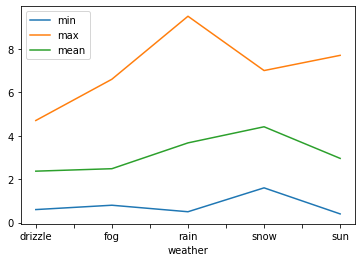

In [17]:
df.groupby("weather")["wind"].agg(("min","max","mean")).plot(kind="line")

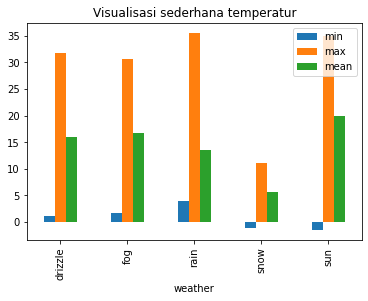

<Figure size 1440x1080 with 0 Axes>

In [28]:
df.groupby("weather")["temp_max"].agg(("min","max","mean")).plot(kind="bar")
plt.title("Visualisasi sederhana temperatur")
plt.figure(figsize=(20,15))

plt.show()

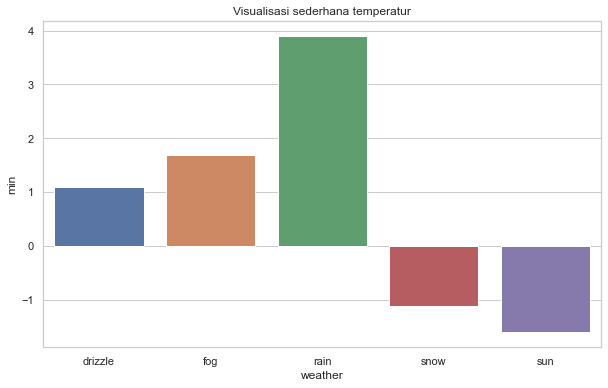

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat plot dengan Seaborn
sns.set(style="whitegrid")  # Set tema plot Seaborn

# Groupby dan agregasi data
agg_data = df.groupby("weather")["temp_max"].agg(("min", "max", "mean")).reset_index()

# Buat plot dengan Seaborn
plt.figure(figsize=(10, 6))  # Set ukuran gambar
sns.barplot(x="weather", y="min", data=agg_data)
plt.title("Visualisasi sederhana temperatur")

# Tampilkan plot
plt.show()


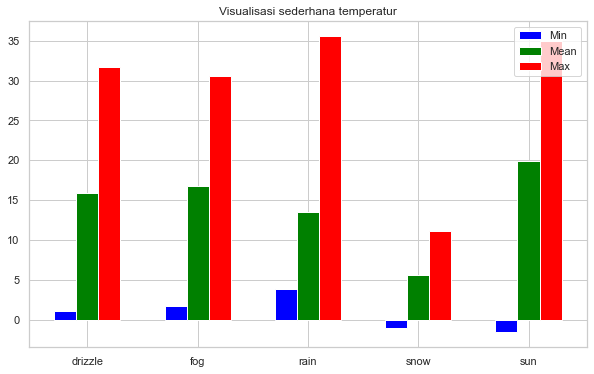

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat plot dengan Seaborn
sns.set(style="whitegrid")  # Set tema plot Seaborn

# Groupby dan agregasi data
agg_data = df.groupby("weather")["temp_max"].agg(("min", "max", "mean")).reset_index()

# Buat plot dengan Seaborn
plt.figure(figsize=(10, 6))  # Set ukuran gambar
width = 0.2  # Lebar setiap bar

# Hitung posisi tengah untuk setiap kategori cuaca
categories = range(len(agg_data["weather"]))
pos_min = [i - width for i in categories]
pos_mean = categories
pos_max = [i + width for i in categories]

# Buat bar plot untuk nilai min, mean, dan max
plt.bar(pos_min, agg_data["min"], width=width, label="Min", color="blue")
plt.bar(pos_mean, agg_data["mean"], width=width, label="Mean", color="green")
plt.bar(pos_max, agg_data["max"], width=width, label="Max", color="red")

plt.title("Visualisasi sederhana temperatur")
plt.xticks(categories, agg_data["weather"])
plt.legend()  # Menampilkan legenda

# Tampilkan plot
plt.show()
